In [ ]:
## Real Time Traffic Event Dtection from Social Media(Twitter)

# Read raw text

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', 100)# set colwidth

stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv("TrafficTweets", header = None)

data.columns = ['traffic_twt']# set column header
data.head()# print first 5 rows

,traffic_twt
0,Traffic is normal on Road towards Bridge from Crossing
1,Broken down vehicle has been removed from Flyover near building
2,Sudden breakdown of a vehicle on Flyover near building has slowed down the traffic towards 7 Poi...
3,Due to a dispersal of Academy traffic is slow on Road towards Bridge from Crossing
4,Broken down vehicle has been removed from Bose Flyover near ramp


# Cleaning and Lemmatization

In [2]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+', text)# split on non-word char
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [3]:
data['twt_clean'] = data['traffic_twt'].apply(lambda x: clean_text(x.lower()))
data.head()

,traffic_twt,twt_clean
0,Traffic is normal on Road towards Bridge from Crossing,"[traffic, normal, road, towards, bridge, crossing]"
1,Broken down vehicle has been removed from Flyover near building,"[broken, vehicle, removed, flyover, near, building]"
2,Sudden breakdown of a vehicle on Flyover near building has slowed down the traffic towards 7 Poi...,"[sudden, breakdown, vehicle, flyover, near, building, slowed, traffic, towards, 7, point, crossing]"
3,Due to a dispersal of Academy traffic is slow on Road towards Bridge from Crossing,"[due, dispersal, academy, traffic, slow, road, towards, bridge, crossing]"
4,Broken down vehicle has been removed from Bose Flyover near ramp,"[broken, vehicle, removed, bose, flyover, near, ramp]"


# Status evolution

In [4]:
def classification(txt):

    dictionary = {'external event' : ['festival', 'match', 'concert', 'procession', 'rain', 'rainfall', 'campaign', 'obstruction', 'vehicle'],
                  'crash or congestion' : ['crash', 'congestion', 'gather', 'dispersal'],
                  'normal traffic' : ['normal', 'usual', 'free']
                 }

    check1 =  any(item in txt for item in dictionary['external event']) 
    check2 =  any(item in txt for item in dictionary['crash or congestion'])
    check3 =  any(item in txt for item in dictionary['normal traffic'])

    if check1 is True:
        return "external event"
    elif check2 is True:
        return "crash or congestion"
    elif check3 is True:
        return "normal traffic"
    else:
        return "external event"

       
data['traffic_class'] = data['twt_clean'].apply(lambda x: classification(x))

data.head()

,traffic_twt,twt_clean,traffic_class
0,Traffic is normal on Road towards Bridge from Crossing,"[traffic, normal, road, towards, bridge, crossing]",normal traffic
1,Broken down vehicle has been removed from Flyover near building,"[broken, vehicle, removed, flyover, near, building]",external event
2,Sudden breakdown of a vehicle on Flyover near building has slowed down the traffic towards 7 Poi...,"[sudden, breakdown, vehicle, flyover, near, building, slowed, traffic, towards, 7, point, crossing]",external event
3,Due to a dispersal of Academy traffic is slow on Road towards Bridge from Crossing,"[due, dispersal, academy, traffic, slow, road, towards, bridge, crossing]",crash or congestion
4,Broken down vehicle has been removed from Bose Flyover near ramp,"[broken, vehicle, removed, bose, flyover, near, ramp]",external event


In [5]:
def status(txt):

    dictionary = {'external event' : ['festival', 'match', 'concert', 'procession', 'rain', 'rainfall', 'campaign', 'obstruction', 'vehicle'],
                  'crash or congestion' : ['crash', 'congestion', 'gather', 'dispersal'],
                  'normal traffic' : ['normal', 'usual', 'free']
                 }

    check1 =  any(item in txt for item in dictionary['external event']) 
    check2 =  any(item in txt for item in dictionary['crash or congestion'])
    check3 =  any(item in txt for item in dictionary['normal traffic'])

    if check1 is True:
        return "1"
    elif check2 is True:
        return "1"
    elif check3 is True:
        return "0"
    else:
        return "1"

       
data['traffic_status'] = data['twt_clean'].apply(lambda x: status(x))

data.head()

,traffic_twt,twt_clean,traffic_class,traffic_status
0,Traffic is normal on Road towards Bridge from Crossing,"[traffic, normal, road, towards, bridge, crossing]",normal traffic,0
1,Broken down vehicle has been removed from Flyover near building,"[broken, vehicle, removed, flyover, near, building]",external event,1
2,Sudden breakdown of a vehicle on Flyover near building has slowed down the traffic towards 7 Poi...,"[sudden, breakdown, vehicle, flyover, near, building, slowed, traffic, towards, 7, point, crossing]",external event,1
3,Due to a dispersal of Academy traffic is slow on Road towards Bridge from Crossing,"[due, dispersal, academy, traffic, slow, road, towards, bridge, crossing]",crash or congestion,1
4,Broken down vehicle has been removed from Bose Flyover near ramp,"[broken, vehicle, removed, bose, flyover, near, ramp]",external event,1


# Data visualization

In [6]:
data.describe()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


,traffic_twt,twt_clean,traffic_class,traffic_status
count,18291,18291,18291,18291
unique,13571,12510,3,2
top,Broken down vehicle has been removed from Flyover,"[broken, vehicle, removed, flyover]",external event,1
freq,95,181,13236,13533


In [7]:
data.groupby('traffic_status').describe().T

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


traffic_status                               0  \
traffic_twt   count                       4758   
              unique                      3043   
              top      Road is free to traffic   
              freq                          89   
twt_clean     count                       4758   
              unique                      2654   
              top     [flyover, free, traffic]   
              freq                         143   
traffic_class count                       4758   
              unique                         1   
              top               normal traffic   
              freq                        4758   

traffic_status                                                        1  
traffic_twt   count                                               13533  
              unique                                              10528  
              top     Broken down vehicle has been removed from Flyover  
              freq                                                   95  
twt_clean     count                                               13533  
              unique                                               9856  
              top                   [broken, vehicle, removed, flyover]  
              freq                                                  181  
traffic_class count                                               13533  
              unique                                                  2  
              top                                        external event  
              freq                                                13236

In [8]:
data['traffic_status'].value_counts()

1    13533
0     4758
Name: traffic_status, dtype: int64

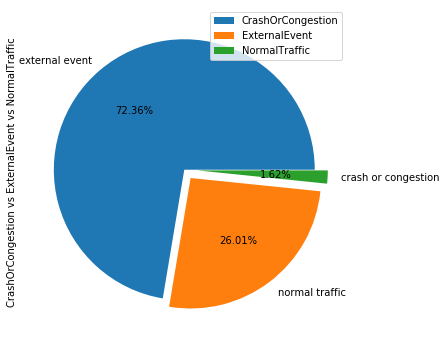

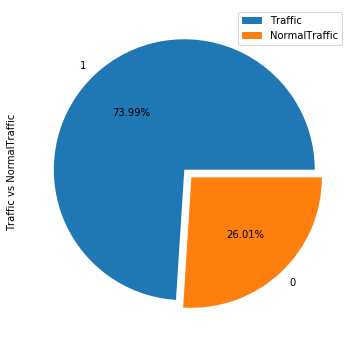

In [9]:
data['traffic_class'].value_counts().plot(kind = 'pie', explode = [0, 0.08, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel('CrashOrCongestion vs ExternalEvent vs NormalTraffic ')
plt.legend(['CrashOrCongestion', 'ExternalEvent', 'NormalTraffic'])
plt.show()

data['traffic_status'].value_counts().plot(kind = 'pie', explode = [0, 0.08], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel('Traffic vs NormalTraffic ')
plt.legend(['Traffic', 'NormalTraffic'])
plt.show()

# Count Vectorization and training-testing dataset split

In [10]:
# convert a collection of text to a matrice of tokens
from sklearn.feature_extraction.text import CountVectorizer
tweet_bow = CountVectorizer(analyzer = clean_text).fit_transform(data['traffic_twt'])

In [11]:
# split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_bow, data['traffic_class'], test_size = 0.20, random_state = 0)

In [12]:
# get the shape of tweet_bow
tweet_bow.shape

(18291, 4489)

# Classification - Naive Bayes Classifier

In [13]:
# create and train the Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

# training

In [14]:
# print the predictions
print(classifier.predict(X_train))

# print the actual values
print(y_train.values)

['external event' 'external event' 'external event' ... 'external event'
 'crash or congestion' 'normal traffic']
['external event' 'external event' 'external event' ... 'external event'
 'crash or congestion' 'normal traffic']


In [15]:
# evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

                     precision    recall  f1-score   support

crash or congestion       0.55      0.71      0.62       221
     external event       0.99      0.98      0.98     10594
     normal traffic       0.97      0.99      0.98      3817

           accuracy                           0.98     14632
          macro avg       0.84      0.89      0.86     14632
       weighted avg       0.98      0.98      0.98     14632


Confusion Matrix: 
 [[  157    64     0]
 [  128 10358   108]
 [    1    25  3791]]

Accuracy:  0.9777200656096228


# testing

In [16]:
# print the predictions
print(classifier.predict(X_test))

# print the actual values
print(y_test.values)

['external event' 'external event' 'external event' ... 'external event'
 'external event' 'external event']
['external event' 'external event' 'external event' ... 'external event'
 'external event' 'external event']


In [17]:
# evaluate the model on the testing dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

                     precision    recall  f1-score   support

crash or congestion       0.60      0.76      0.67        76
     external event       0.99      0.97      0.98      2642
     normal traffic       0.95      0.99      0.97       941

           accuracy                           0.97      3659
          macro avg       0.85      0.90      0.87      3659
       weighted avg       0.97      0.97      0.97      3659


Confusion Matrix: 
 [[  58   18    0]
 [  38 2553   51]
 [   0   14  927]]

Accuracy:  0.9669308554249795


# Classification - Support Vector Machine(SVM)

In [18]:
# split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_bow, data['traffic_class'], test_size = 0.20, random_state = 0)

# get the shape of tweet_bow
tweet_bow.shape

(18291, 4489)

In [19]:
# create and train the SVM
from sklearn import svm

# SVC - maximize datapoints from the hyperplane, kernel - mapping data into a higher dimentional space, gamma - kernel coefficient, C - penalty for incorrectly placed datapoints
classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2.0)
classifier.fit(X_train, y_train)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# training

In [20]:
# print the predictions
print(classifier.predict(X_train))

# print the actual values
print(y_train.values)

['external event' 'external event' 'external event' ... 'external event'
 'crash or congestion' 'normal traffic']
['external event' 'external event' 'external event' ... 'external event'
 'crash or congestion' 'normal traffic']


In [21]:
# evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

                     precision    recall  f1-score   support

crash or congestion       1.00      1.00      1.00       221
     external event       1.00      1.00      1.00     10594
     normal traffic       1.00      1.00      1.00      3817

           accuracy                           1.00     14632
          macro avg       1.00      1.00      1.00     14632
       weighted avg       1.00      1.00      1.00     14632


Confusion Matrix: 
 [[  221     0     0]
 [    0 10594     0]
 [    0     0  3817]]

Accuracy:  1.0


# testing

In [22]:
# print the predictions
print(classifier.predict(X_test))

# print the actual values
print(y_test.values)

['external event' 'external event' 'external event' ... 'external event'
 'external event' 'external event']
['external event' 'external event' 'external event' ... 'external event'
 'external event' 'external event']


In [23]:
# evaluate the model on the testing dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

                     precision    recall  f1-score   support

crash or congestion       1.00      0.99      0.99        76
     external event       1.00      1.00      1.00      2642
     normal traffic       1.00      1.00      1.00       941

           accuracy                           1.00      3659
          macro avg       1.00      1.00      1.00      3659
       weighted avg       1.00      1.00      1.00      3659


Confusion Matrix: 
 [[  75    0    1]
 [   0 2642    0]
 [   0    0  941]]

Accuracy:  0.9997267012845039


# Classification - K Nearest Neighbor(KNN)

In [24]:
# split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet_bow, data['traffic_class'], test_size = 0.20, random_state = 0)

# get the shape of tweet_bow
tweet_bow.shape

(18291, 4489)

In [25]:
# create and train the KNN
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# training

In [27]:
# print the predictions
print(knn.predict(X_train))

# print the actual values
print(y_train.values)

['external event' 'external event' 'external event' ... 'external event'
 'crash or congestion' 'normal traffic']
['external event' 'external event' 'external event' ... 'external event'
 'crash or congestion' 'normal traffic']


In [28]:
# evaluate the model on the training dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = knn.predict(X_train)
print(classification_report(y_train, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

                     precision    recall  f1-score   support

crash or congestion       1.00      1.00      1.00       221
     external event       1.00      1.00      1.00     10594
     normal traffic       1.00      1.00      1.00      3817

           accuracy                           1.00     14632
          macro avg       1.00      1.00      1.00     14632
       weighted avg       1.00      1.00      1.00     14632


Confusion Matrix: 
 [[  221     0     0]
 [    0 10594     0]
 [    0     0  3817]]

Accuracy:  1.0


# testing

In [29]:
# print the predictions
print(knn.predict(X_test))

# print the actual values
print(y_test.values)

['external event' 'external event' 'external event' ... 'external event'
 'external event' 'external event']
['external event' 'external event' 'external event' ... 'external event'
 'external event' 'external event']


In [30]:
# evaluate the model on the testing dataset
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

                     precision    recall  f1-score   support

crash or congestion       0.96      0.92      0.94        76
     external event       0.99      0.96      0.98      2642
     normal traffic       0.90      0.98      0.94       941

           accuracy                           0.97      3659
          macro avg       0.95      0.95      0.95      3659
       weighted avg       0.97      0.97      0.97      3659


Confusion Matrix: 
 [[  70    3    3]
 [   2 2543   97]
 [   1   18  922]]

Accuracy:  0.9661109592784914


# K Value

In [31]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

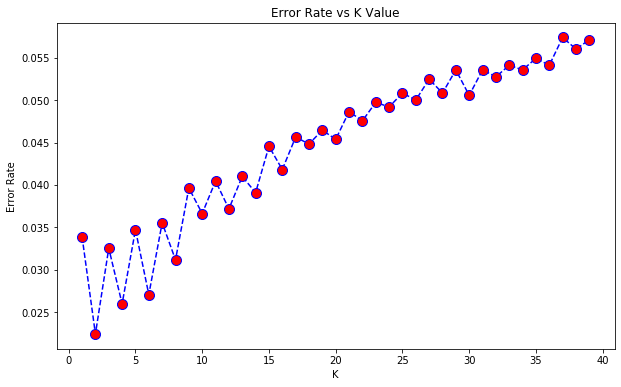

In [32]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
# evaluate with K Value = 2

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = knn.predict(X_test)
print(classification_report(y_test, pred))
print()
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

                     precision    recall  f1-score   support

crash or congestion       0.94      0.96      0.95        76
     external event       0.99      0.98      0.99      2642
     normal traffic       0.95      0.97      0.96       941

           accuracy                           0.98      3659
          macro avg       0.96      0.97      0.96      3659
       weighted avg       0.98      0.98      0.98      3659


Confusion Matrix: 
 [[  73    0    3]
 [   4 2589   49]
 [   1   25  915]]

Accuracy:  0.977589505329325


# Data visualization

    Classifier  Crash or Congestion  External Event  Normal Traffic
0  Naive Bayes                 0.60             1.0            0.94
1          SVM                 0.99             1.0            0.99
2          KNN                 0.95             1.0            0.95
    Classifier  Crash or Congestion  External Event  Normal Traffic
0  Naive Bayes                 0.76            0.97            0.99
1          SVM                 0.99            1.00            1.00
2          KNN                 0.95            0.98            0.97
    Classifier  Crash or Congestion  External Event  Normal Traffic
0  Naive Bayes                 0.67            0.98            0.97
1          SVM                 0.99            1.00            1.00
2          KNN                 0.95            0.99            0.96


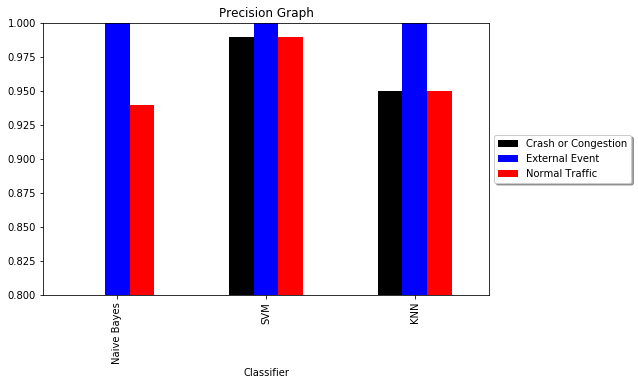

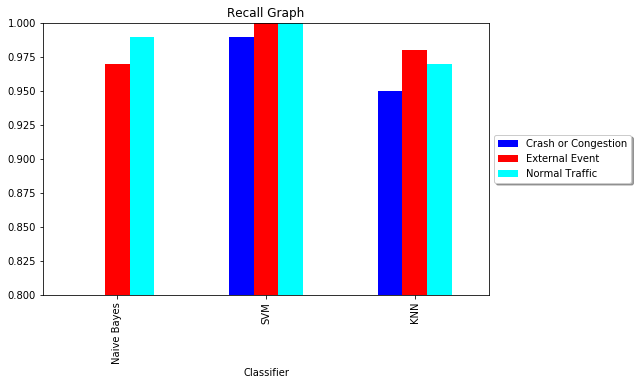

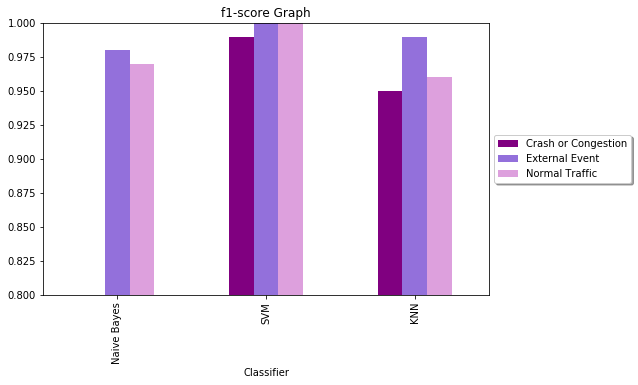

In [34]:
#Data visualization
#Precision

df=pd.DataFrame([['Naive Bayes',0.60, 1.00, 0.94],['SVM',0.99, 1.00, 0.99],['KNN',0.95, 1.00, 0.95]],columns=['Classifier','Crash or Congestion', 'External Event', 'Normal Traffic'])
print(df)

df.plot(x='Classifier',kind='bar',title='Precision Graph',figsize = (8, 5),color=('black','blue','red'),ylim=(0.8,1))
lgd = plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fancybox=True,shadow=True)

#Recall

df=pd.DataFrame([['Naive Bayes',0.76, 0.97, 0.99],['SVM',0.99, 1.00, 1.00],['KNN',0.95, 0.98, 0.97]],columns=['Classifier','Crash or Congestion', 'External Event', 'Normal Traffic'])
print(df)

df.plot(x='Classifier',kind='bar',title='Recall Graph',figsize = (8, 5),color=('blue','red','cyan'),ylim=(0.8,1))
lgd = plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fancybox=True,shadow=True)

#f1-score

df=pd.DataFrame([['Naive Bayes',0.67, 0.98, 0.97],['SVM',0.99, 1.00, 1.00],['KNN',0.95, 0.99, 0.96]],columns=['Classifier','Crash or Congestion', 'External Event', 'Normal Traffic'])
print(df)

df.plot(x='Classifier',kind='bar',title='f1-score Graph',figsize = (8, 5),color=('purple','mediumpurple','plum'),ylim=(0.8,1))
lgd = plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fancybox=True,shadow=True)

    Classifier  Accuracy  Precision  Recall  f1-score
0  Naive Bayes  0.966931      0.846   0.906     0.873
1          KNN  0.977590      0.966   0.966     0.966
2          SVM  0.999727      0.993   0.996     0.996


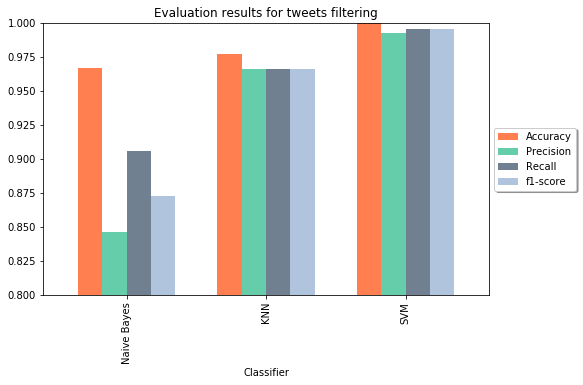

In [35]:
df=pd.DataFrame([['Naive Bayes',0.9669308554249795,0.846,0.906,0.873],['KNN',0.977589505329325,0.966,0.966,0.966],['SVM',0.9997267012845039,0.993,0.996,0.996]],columns=['Classifier','Accuracy','Precision','Recall','f1-score'])
print(df)

df.plot(x='Classifier',kind='bar',title='Evaluation results for tweets filtering',figsize = (8, 5),color=('coral','mediumaquamarine','slategrey','lightsteelblue'),width=0.7,ylim=(0.8,1))
lgd = plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fancybox=True,shadow=True)